# Data Analysis

This notebook allows to gain insight in both used dataset `tweet.zip` and `BTC-TUSD.parquet`.

In [1]:
from helpers.data_analysis import TweetsAnalyzer, BTCAnalyzer

%load_ext autoreload
%autoreload 2

## BTC

We start by looking at the `BTC-USDT.parquet` dataset. First we load the file.

In [2]:
btc = BTCAnalyzer(file_path='data/BTC-USDT.parquet')

########## Basic information ##########
- Shape of dataset: (2753182, 9)
- Average time granularity: 0 days 00:01:00.185196 (~1 min granularity)
- Data starting from 2017-08-17 04:00:00+00:00 to 2022-11-16 23:59:00+00:00
- Data Types of each column:
open                            float32
high                            float32
low                             float32
close                           float32
volume                          float32
quote_asset_volume              float32
number_of_trades                 uint16
taker_buy_base_asset_volume     float32
taker_buy_quote_asset_volume    float32
dtype: object


In [3]:
btc.data.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,7564.906738,3,0.075183,320.390839
2017-08-17 04:01:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0.000000,0,0.000000,0.000000
2017-08-17 04:02:00+00:00,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,1117.542969,2,0.261074,1117.542969
2017-08-17 04:03:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,51.171852,3,0.012008,51.171852
2017-08-17 04:04:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,599.999329,1,0.140796,599.999329


We can inspect the price and return evolution in a specific time range.

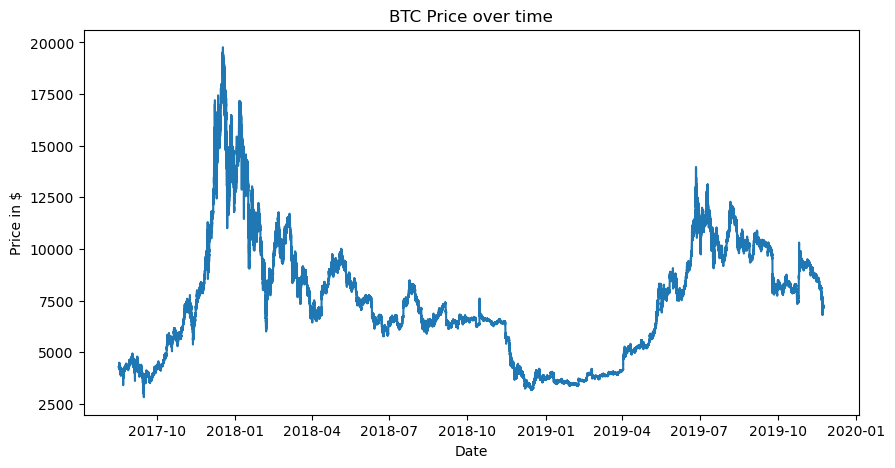

In [4]:
btc.plot_price(start_date="2017-08-17 04:00:00", end_date="2019-11-23 15:45:00") 

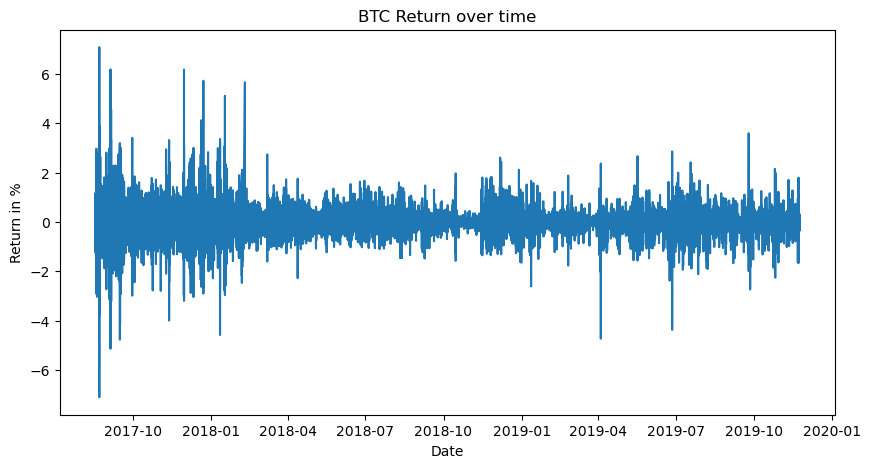

In [5]:
btc.plot_return(start_date="2017-08-17 04:00:00", end_date="2019-11-23 15:45:00")  # Note that we have a granularity of 1 minute

> Note that the granularity is the minute, then the return values are from a one-minute time range.

## Tweets

We can now have a look at the `tweets.zip` file.

In [6]:
tweets = TweetsAnalyzer(file_path='data/tweets.zip')  # ~3min to run

17chunks [02:22,  8.38s/chunks]                    


########## Basic information ##########
- Shape of dataset: (16889765, 10)
- Data starting from 2007-04-19 07:14:38+00:00 to 2019-11-23 15:45:57+00:00
- Data Types of each column:
index                      int64
id                       float64
user                      object
fullname                  object
url                       object
timestamp    datetime64[ns, UTC]
replies                    int64
likes                      int64
retweets                   int64
text\r                    object
dtype: object


In [7]:
tweets.data.head()

,index,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
0,11291156,3.286741e+07,chrispychong,chrispy,NaN,2007-04-19 07:14:38+00:00,0,0,2,is happily mugging at BTC where she will hook ...
1,21,1.110303e+09,halfin,halfin,NaN,2009-01-11 03:33:52+00:00,790,14470,5542,Running bitcoin\r
2,5164467,1.136750e+09,halfin,halfin,NaN,2009-01-21 17:29:40+00:00,55,1544,392,Looking at ways to add more anonymity to bitco...
3,5210398,1.153097e+09,halfin,halfin,NaN,2009-01-27 20:14:10+00:00,44,1042,277,Thinking about how to reduce CO2 emissions fro...
4,5269667,1.158417e+09,fafcffacfff,GoldLover,NaN,2009-01-29 13:37:53+00:00,0,28,16,From: Satoshi Nakamoto - 2009-01-11 22:32 Bitc...


One important information we want to have is the distribution of the performance, i.e. replies, likes, retweets. This features allow us to assess the impact of the tweet. In this project we might be interested only on the tweet with at least some impact to avoid bot tweeter accounts or people without real fan base that are just mentioning the bitcoin in their tweet. 

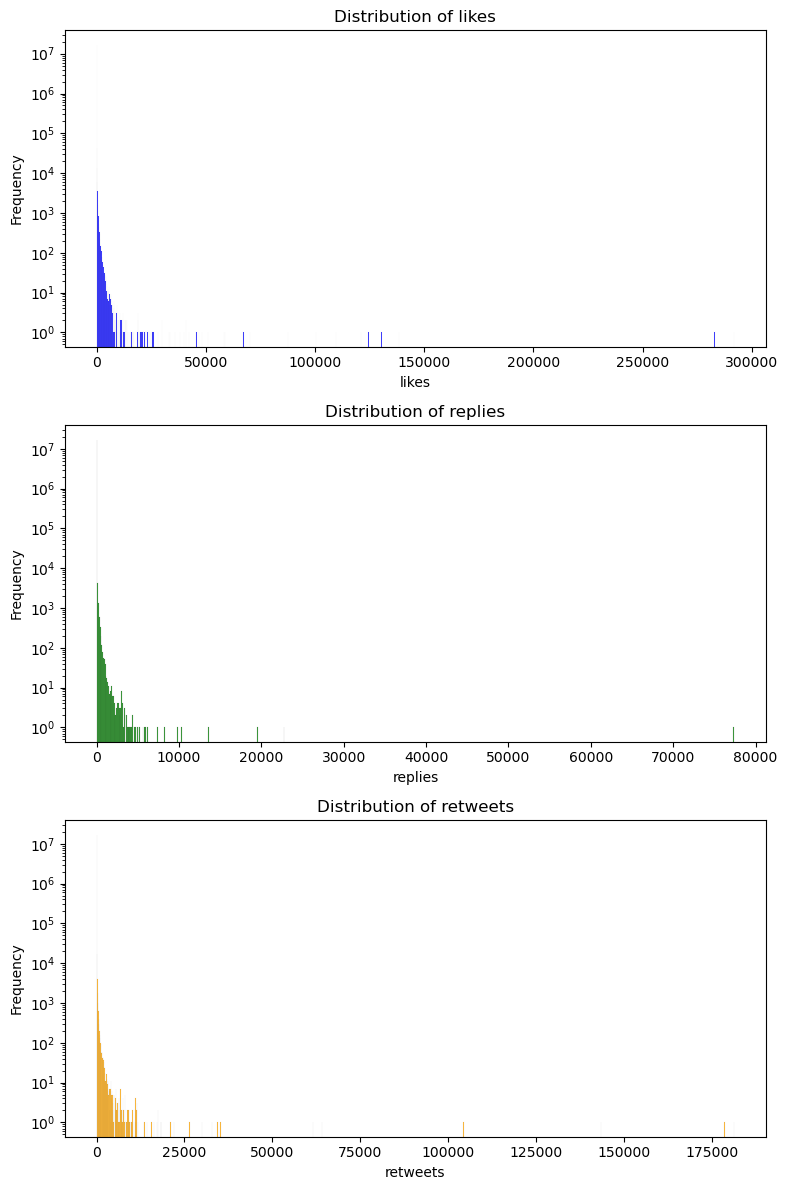

In [8]:
metrics_stats = tweets.performance_distribution()  # ~50s to run

In [9]:
metrics_stats

,likes,replies,retweets
count,1.688976e+07,1.688976e+07,1.688976e+07
mean,2.661873e+00,3.139260e-01,1.048771e+00
std,1.467740e+02,2.317522e+01,8.604649e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
90%,1.000000e+00,0.000000e+00,1.000000e+00
91%,1.000000e+00,0.000000e+00,1.000000e+00
92%,1.000000e+00,0.000000e+00,1.000000e+00
93%,1.000000e+00,0.000000e+00,1.000000e+00
94%,2.000000e+00,0.000000e+00,1.000000e+00


We see that less than 1% of the tweets are consider impactful/meaningful if we put a threshold at 10 likes, replies and/or retweets.

Computing the number of tweet per threshold of perf: 100%|██████████| 50/50 [00:15<00:00,  3.13threshold/s]


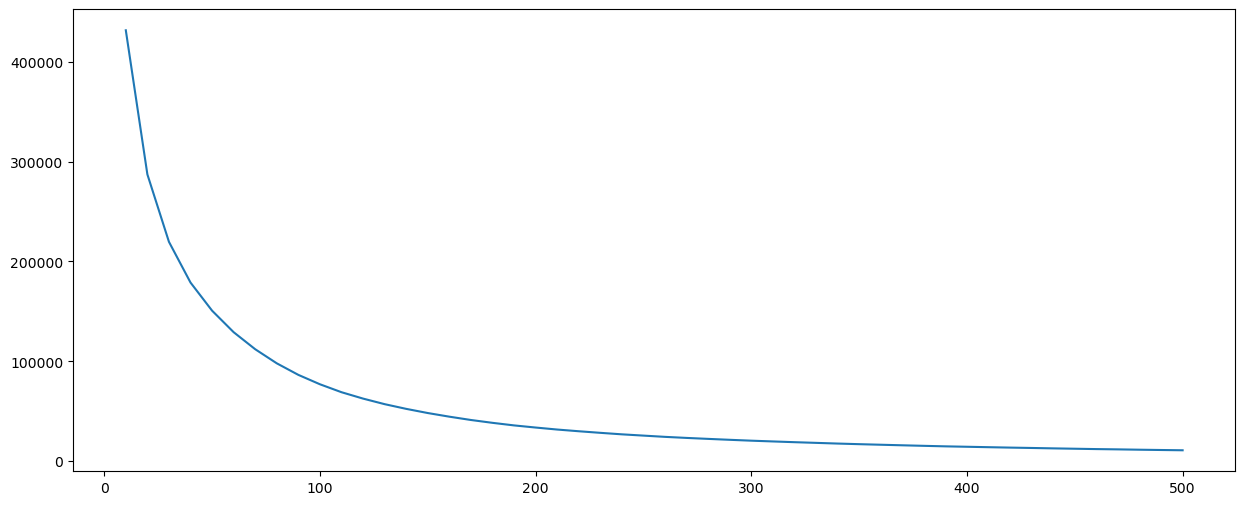

In [10]:
tweets.pertinent(start_date="2017-08-17 04:00:00", end_date="2019-11-23 15:45:00")

We cross the time range of both our dataset, tweets and BTC, to only keep the data that we can use to see if some correlation exist between them.

In [11]:
start, end = btc.data.index.min(), tweets.data["timestamp"].max()
interval_day, interval_year = round((end - start).days, 2), round((end - start).days/365, 2)
print(f"We are working with a time interval of {interval_day} days or, equivalently, {interval_year} years.")

We are working with a time interval of 828 days or, equivalently, 2.27 years.
